# Hypothesis Testing

__Agenda__

- Hypothesis Testing - Why do we need them?

- One or two tailed hypothesis testing? Which one we should use, when?

- Discussion of significance level. It's effect on our study.

- Diagnosis and understanding of possible mistakes of the study.

- Seeing hypothesis testing in action

- Discussion of T-distribution. Why do we start talking about T-dist?

- One sample and two sample T-tests.



<img src="img/sweet.jpg" width="350">

# Null and Alternative Hypotheses

 

<img src="img/img3.png" width="250">

A toy picture of science has it that the scientist formulates a hypothesis that explains or generalizes from some set of observations, and then conducts some experiment, which will either confirm or refute that hypothesis.

But this is an oversimplification of good practice. Consider the possibility that the experiment yield statistically improbable results. In that case it may well be a mistake to generalize from those results or to reject an hypothesis that doesn't predict them.

Often the confirmation of some testing or **alternative hypothesis, $H_\alpha$**, is a _relative_ affair, where it is measured against some **null hypothesis, $H_0$**.

If an alternative hypothesis states that there is some significant relationship between two variables, then the null hypothesis simply states that there is no such relationship.

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

In any experiment we have two statements:

## Alternative Hypothesis ($H_{a}$)
<img src="img/giphy.gif" width="350">

- claims the difference in the results due to the independent variable.

- Alternative can be directional or non-directional.

## Null Hypothesis ($H_{0}$)

<img src = "https://i1.wp.com/vidyasury.com/wp-content/uploads/2013/03/You_Rock_You_Rule.jpeg?resize=576%2C576&ssl=1" width = 350>

- $H_0$ should be logical complement of $H_{a}$.

- That is to say: If Alternative is bidirectional than null-hypothesis claims no relation between independent and dependent variables

- Alternative is directional (say claims a positive relation) then null claims there is no positive relation which means no effect or an effect in the opposite direction of the Alternative hypothesis.

# $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is Too Unlikely?

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.

## Decision Rule - Significance Level ($\alpha$)

- if $H_{0}$ would be true what is the probability (p_value) of getting such experiment results by just chance. 

- If this probability is less than a critical pre-determined level $\alpha$ (significance level - $\alpha$ - value) then we reject the null hypothesis.

- If the obtained probability $p_{value} \leq \alpha$: reject $H_{0}$

- If the obtained probability $p_{value} \geq \alpha$: fail to reject $H_{0}$, retain $H_{0}$

- Usually $\alpha = 0.05$ - Let's talk what it means in action?

# An Example

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
import pickle 

In [3]:
.5*9

4.5

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 25 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

In [4]:
x = np.linspace(6000, 12000, 100, )

In [5]:
y = stats.norm.pdf(x, loc = 9000, scale = 900)

In [6]:
import matplotlib.pyplot as plt

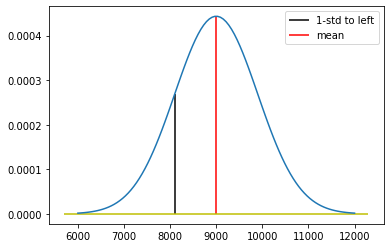

In [7]:
plt.plot(x,y)
plt.vlines(x = 8100, ymin = 0, ymax = stats.norm.pdf(8100, loc = 9000, scale = 900), label= '1-std to left')
plt.vlines(x = 9000, ymin = 0, ymax = stats.norm.pdf(9000, loc = 9000, scale = 900), color = 'r', label = 'mean')

plt.hlines(y = 0,xmin = 5700, xmax = 12300, color = 'y' )
plt.legend()
plt.title('African Elephant weight dist')
plt.show()

What is our alternative hypothesis here?


Let's set a threshold value of $p = 0.05$ for rejecting the null hypothesis.

The standard error for our sample is: $\large\frac{\sigma}{\sqrt{n}}$

lets define a function called `calc_se` using that formula!

In [ ]:
# take 2 minutes to draft a function together to calc_se


In [11]:
elephant_sigma = 900
elephant_n = 25

se = elephant_sigma/np.sqrt(elephant_n)
print(se)

180.0


In [12]:
np.sqrt(25)

5.0

In [13]:
900/5

180.0

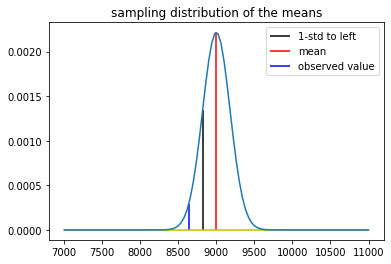

In [15]:
xsampling = np.linspace(7000, 11000, 100)
ysampling = stats.norm.pdf(xsampling, loc = 9000, scale= 180)

plt.plot(xsampling,ysampling)
plt.vlines(x = 8820, ymin = 0, ymax = stats.norm.pdf(8820, loc = 9000, scale = 180), label= '1-std to left', color = 'black')
plt.vlines(x = 9000, ymin = 0, ymax = stats.norm.pdf(9000, loc = 9000, scale = 180), color = 'r', label = 'mean')
plt.vlines(x = 8637, ymin = 0, ymax = stats.norm.pdf(8637, loc = 9000, scale = 180), color = 'b', label = 'observed value')
plt.title('sampling distribution of the means')
plt.hlines(y = 0,xmin = 7000, xmax = 11000, color = 'y' )
plt.legend()
plt.show()

And while we're at it, lets whip up a function called ```calc_z_score``` that represents this formula: $\large\frac{\bar{x} - \mu}{se}$

In [ ]:
# take 2 minutes to draft a function together to calc_z_score


In [ ]:
elephant_x_bar = None
elephant_mu = None
elephant_se = None

zscore = calc_z_score(elephant_x_bar, elephant_mu, elephant_se)
print(zscore)

In [16]:
9000-8637

363

In [17]:
363/180

2.0166666666666666

In [19]:
1- stats.norm.cdf(2.01)

0.02221559442943144

In [21]:
stats.norm.cdf(-2.01)

0.022215594429431475

So now that we've calculated the Z-score, we want to calculate the p value of that zscore using a cumulative distribution function(cdf).

We use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value. You can also use this information to determine the probability that an observation will be greater than a certain value, or between two values.

Lets use the [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) package from scipy module to calculate the cdf. 

<img src="https://matthew-brett.github.io/teaching/_images/on_cdfs-4.png">

#### Using stats' norm library, we can calculate the cdf with the zscore of a normal distribution

#### (only open the bottom section after you've written some code above :)

Looks like the 'area of the tail' corresponding to this z-score is only 2.2% which is < our 5% threshold value (our $\alpha$).

Great! That means we can reject our null hypothesis right? - since "If the obtained probability $p_{value} \leq \alpha$: reject $H_{0}$"

Reviewing our null and alernative hypothesis we confirmed that we are comparing a non-directional change, and thus we need to account for both tails of the distribution.

The area for both tails is thus 4.4%, still less than our 5% threshold value.

Translation: </br>
Given the null hypothesis is true, there is a 4.4% chance that the observed weight of the Gabonese elephants were the result of mere random chance. Because that is less than 5% (a 1-in-20 chance), we can confidently reject the null hypothesis and claim that the weight of the Gabonese elephants are statistically significant. 

### note: we are **not accepting** the alternative, **merely rejecting** the null hypothesis. 

## What could go wrong?
What are the possible mistakes we can make just due to the construction of the algorithm?

# Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

<img src="https://www.researchgate.net/profile/Joris_Meurs/publication/305265032/figure/fig6/AS:391272159301649@1470297960569/The-confusion-matrix-of-accepting-or-rejecting-the-null-hypothesis-H0-or-the.png" width=500px height=500px>

<img src="https://dp8v87cz8a7qa.cloudfront.net/45396/5bd20d03240611540492547.png" width=500px height=500px>




# An Example

Suppose I start flipping the same coin twice a day. What I'm curious about is whether the coin is fair or not.

My null hypothesis will be that there is "nothing to see here", i.e. that the coin is after all fair. The alternative hypothesis will of course be that the coin is not.

- **NH**: The coin is fair.
- **AH**: The coin is biased.

My statistical test will consist of flipping the coin a number of times and looking at those flips' results.

If the coin is fair, then my test will result either in a true negative (accurate) or a false positive (inaccurate). If the coin is biased, then the test will result either in a true positive (accurate) or a false negative (inaccurate).

Suppose that I set my value for $\beta$. What I want to understand is how the threshold for rejection of the null hypothesis varies as a function of $\beta$ and of the number of tosses $k$ that come up "heads".

I want to write a function that will tell me, given inputs for $p$ and $k$, how many tosses I would need to make before I should reject the null hypothesis.

We'll use the [.binom_test()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html) method in scipy's stats module.

In [ ]:
# What number of tosses would I need to make before I should reject null hypothesis.
# based on a given p_value

def how_many_trials_to_reject_null(x, beta, p, test_alternative='two-sided'):
    n = x                  #start the number of trials at the number of successes
    
    # .binom_test() needs the number of successes(x), the number of trials(n), 
    # the hypothesized probability of success(p), and indicate the type of alternative hypothesis
    p_value = stats.binom_test(x, n, p, alternative=test_alternative)
    
    while p_value >= beta: # continue to calculate the p_value until its no longer >= beta
        n += 1             # Increase the number of trials every loop.
        p_value = stats.binom_test(x, n, p, alternative=test_alternative)
        
    return n               # Let us know how many trials we gotta do

In [ ]:
# Let's test it out!
how_many_trials_to_reject_null(1, beta=0.05, p=0.5)

### Interpretation:

Given we only observe 1 'success' (a head), and assuming the null hypothesis that the coin is far is true, then it would take 9 trials before we could confidently reject the null hypothesis. 

### Lets checkout a [powerful visual](https://seeing-theory.brown.edu/probability-distributions/index.html) and overall top notch study sheet of what we tested above (chapter 3: CLT)

## Example Scenarios for Hypothesis Testing

- Chemistry - do inputs from two different barley fields produce different
yields?
- Astrophysics - do star systems with near-orbiting gas giants have hotter
stars?
- Economics - demography, surveys, etc.
- Medicine - BMI vs. Hypertension, etc.
- Business - which ad is more effective given engagement?
- Sports - [Do shoes predict marathon winners?](https://www.nytimes.com/interactive/2019/12/13/upshot/nike-vaporfly-next-percent-shoe-estimates.html)

![img1](./img/img1.png)

![img2](./img/img2.png)

# T-Distribution

Student's t-distribution (or simply the t-distribution) is any member of a family of continuous probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown.

![](https://www.geogebra.org/resource/xp7A3A53/uzHZ4VnO8dAwAMku/material-xp7A3A53.png)

The fatter tails of a T distribution represent larger p values. 

But as ```n``` increases past 30, the distribution starts to resemble a normal Z distribution. by n=1000 they are vitually indistinguishable 

![](https://www.researchgate.net/profile/Demetris_Christopoulos/post/What_is_the_rationale_behind_the_magic_number_30_in_statistics/attachment/59d6280bc49f478072e9b8f6/AS%3A272429056757760%401441963556404/download/student_normal_30.jpg)

<img src="img/df.png" width="550">

- Consider the case: We have a sample of 4 elements [2, 8, 5, A]. We don't know A but we know the $\bar{x} = 6$. Can we find A? 

# T-Tests

### Why use it?
- Sometimes the population standard deviation is irrelevant, and sometimes it’s
unknown. (we’ll get to the different types of t-test later)
- Sometimes a sample is too small to be confident that it’s an accurate representation of reality

### T vs Z (again)

A t-test is like a modified z-test:
- Penalize for small sample size - “degrees of freedom”
- Use sample std. dev. (```s```) to estimate population σ

![img5](./img/img5.png)

# Quick Review
### Language of Hypothesis Testing

- If p < α : we *reject* the null hypothesis<br>
- If p > α : we *fail to reject* the null hypothesis

Language is **important**

### What if the experiment fails?

- Don’t throw out failed experiments
- This methodology, with this data, does not produce significant results
 - More data
 - More time
 - More details

### T-test success recipe

Regardless of the type of t-test you are performing, there are 5 main steps to executing them:

- Set up null and alternative hypotheses

- Choose a significance level

- Calculate the test statistic

- Determine the critical or p-value (find the rejection region)

- Compare t-value with critical t-value to accept or reject the Null hypothesis.

# Question 1
Is this any difference from population?

In [ ]:
pop_mean = 85
sample_data = [90,100,110]

#### Use `scipi.stats` to import the appropriate ttest

In [ ]:
# Your Code Here

#### (Manual implementation)

In [ ]:
from statistics import stdev

data = [90,100,110]
mu = 85
n = len(data)
s = stdev(data)
df = n-1

t = (100-85)/(s/(n**.5))
print(t, df)

# Question 2

I'm buying jeans from store A and store B.  I know nothing about their inventory other than prices. Should I go just one store for a less expensive pair of jeans?
I'm pretty apprehensive about this big decision so alpha = 0.10

Try this both manually and with scipy

In [ ]:
store1 = [20,30,30,50,75,25,30,30,40,80]
store2 = [60,30,70,90,60,40,70,40]

from scipy.stats import ttest_ind

In [ ]:
# Your Code Here

# Question 3
Given the same data 1, how many more samples would you need to achieve p = 0.01, assuming sample mean and sample std. dev. do not change.

In [ ]:
data = [90,100,110]
mu = 85
s = None
n = None